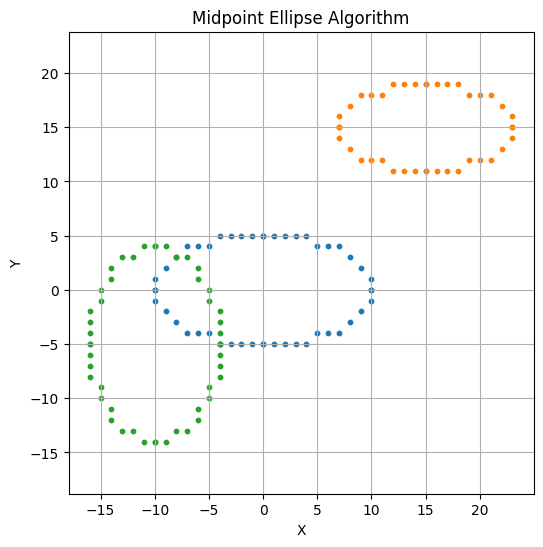

In [1]:
import matplotlib.pyplot as plt

def midpoint_ellipse(xc, yc, rx, ry):
    x_coords, y_coords = [], []
    x, y = 0, ry
    rx2 = rx*rx
    ry2 = ry*ry
    # Region 1
    d1 = ry2 - rx2*ry + 0.25*rx2
    dx = 2*ry2*x
    dy = 2*rx2*y
    while dx < dy:
        pts = [(xc+x, yc+y), (xc-x, yc+y), (xc+x, yc-y), (xc-x, yc-y)]
        for px, py in pts:
            x_coords.append(px)
            y_coords.append(py)
        if d1 < 0:
            x += 1
            dx += 2*ry2
            d1 += dx + ry2
        else:
            x += 1
            y -= 1
            dx += 2*ry2
            dy -= 2*rx2
            d1 += dx - dy + ry2
    # Region 2
    d2 = ry2*(x+0.5)**2 + rx2*(y-1)**2 - rx2*ry2
    while y >= 0:
        pts = [(xc+x, yc+y), (xc-x, yc+y), (xc+x, yc-y), (xc-x, yc-y)]
        for px, py in pts:
            x_coords.append(px)
            y_coords.append(py)
        if d2 > 0:
            y -= 1
            dy -= 2*rx2
            d2 += rx2 - dy
        else:
            x += 1
            y -= 1
            dx += 2*ry2
            dy -= 2*rx2
            d2 += dx - dy + rx2
    return x_coords, y_coords

# Draw ellipses with different centers
ellipses = [(0,0,10,5), (15,15,8,4), (-10,-5,6,9)]
plt.figure(figsize=(6,6))
for e in ellipses:
    xc,yc,rx,ry = e
    x_pts, y_pts = midpoint_ellipse(xc,yc,rx,ry)
    plt.scatter(x_pts, y_pts, s=10)

plt.title("Midpoint Ellipse Algorithm")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axis('equal')
plt.show()
